Content:
    
1. [Importing libraries](#1)
1. [Basic information about the dataset](#2)
    *    [Dimensions of our dataset](#3)
    *    [The datatypes of each column of our dataset](#4)
    *    [Check for duplicates](#5)
    *    [Undestanding the numeric values](#6)
1. [Exploratory Analysis](#7)
    *    [Price deepdiving](#8)
    *    [Undestanding the correlation between features](#9)
    *    [Area features](#10)
    *    [Price x Area features](#11)
    *    [Year features](#12)
    *    [Price x Year features](#13)
    *    [View features](#14)
    *    [Condition](#15)
    *    [Grade](#16)
    *    [Bedrooms](#17)
    *    [Bathrooms [and lavatory]](#18)
    *    [Floors](#19)
    *    [Date features](#20)
    *    [Geolocalization features](#21)
1. [Train-Test Split](#22)
1. [EDA conclusions](#23)
1. [Prediction Modles](#24)
    *    [Linear Regression](#25)
    *    [Random Forest](#26)
    
    

#### Importing libraries<a id = "1"></a>

In [82]:
import os
import warnings
import math
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

warnings.simplefilter("ignore")

In [83]:
# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/kc_house_data.csv")
#print(df.head())

print("Dimensiones del dataset:", df.shape)

Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1
Dimensiones del dataset: (21613, 21)


We have 21 columns in the dataset, as it follows:

- **id:** Unique ID for each home sold
- **date:** Date of the home sale
- **price:** Price of each home sold
- **bedrooms:** Number of bedrooms
- **bathrooms:** Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- **sqft living:** Square footage of the apartments interior living space
- **sqft lot:** Square footage of the land space
- **floors:** Number of floors
- **waterfront:** A dummy variable for whether the apartment was overlooking the waterfront or not
- **view:** An index from 0 to 4 of how good the view of the property was
- **condition:** An index from 1 to 5 on the condition of the apartment
- **grade:** An index from 1 to 13, where 1 falls short of building construction and design and  13 have a high quality level of construction and design
- **sqft above:** The square footage of the interior housing space that is above ground level
- **sqft basement:** The square footage of the interior housing space that is below ground level
- **yr built:** The year the house was initially built
- **yr renovated:** The year of the house's last renovation
- **zipcode:** What zipcode area the house is in
- **lat:** Lattitude
- **long:** Longitude
- **sqft living15:** The square footage of interior housing living space for the nearest 15 neighbors
- **sqft lot15:** The square footage of the land lots of the nearest 15 neighbors

In [84]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Basic information:<a id = "2"></a>

#### Dimensions of our dataset:<a id = "3"></a>




In [85]:
shape = df.shape
print('The number of lines presented in this dataset are {}'.format(shape[0]))
print('The number of columns presented in this dataset are {}'.format(shape[1]))

The number of lines presented in this dataset are 21613
The number of columns presented in this dataset are 21


#### The datatypes of each column of our dataset: <a id = "4"></a>


All of these are correct except for the timestamp feature which we will cast to a readable datetime format. We will also remove the id column for this analysis.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [87]:
df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['id'], inplace = True)

#### Check for duplicates: <a id = "5"></a>

In [88]:
print("We find {} duplicated values. Great! Looks like we don't have this problem to solve!".format(df.duplicated().sum()))

We find 0 duplicated values. Great! Looks like we don't have this problem to solve!


#### Undestanding the numeric values: <a id = "6"></a>

This table is a bit difficult to analyze, but with it we can already get some spoilers of what we are going to face.

* Floors is not in an integer format.

* It seems that we have a property with 33 bedrooms and another (maybe the same one) with 8 bathrooms.

* The variables yr_renovated and waterfront seem to be very underfilled, perhaps it is worth creating boolean variables to represent them.

In [89]:
interesting_columns = [col for col in df.select_dtypes(include = ['float64', 'int64']).columns if col not in ['lat', 'long', 'zipcode']]
df[interesting_columns].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,6210.00,871200.00


#### EDA <a id = "7"></a>


#### Price deepdiving... <a id = "8"></a>

First of all, let's start with the price variable. The graph below shows that we have outliers in our database, since the data distribution tends to be normal, but the right ends up distorting the distribution. Linear models like the ones we will apply later are extremely sensitive to this behavior and to facilitate the development process, we will choose to remove from our scope the values that are above 1.156.000. In other words, we will develop a model that will accurately represent 95% of the cases present in the database.

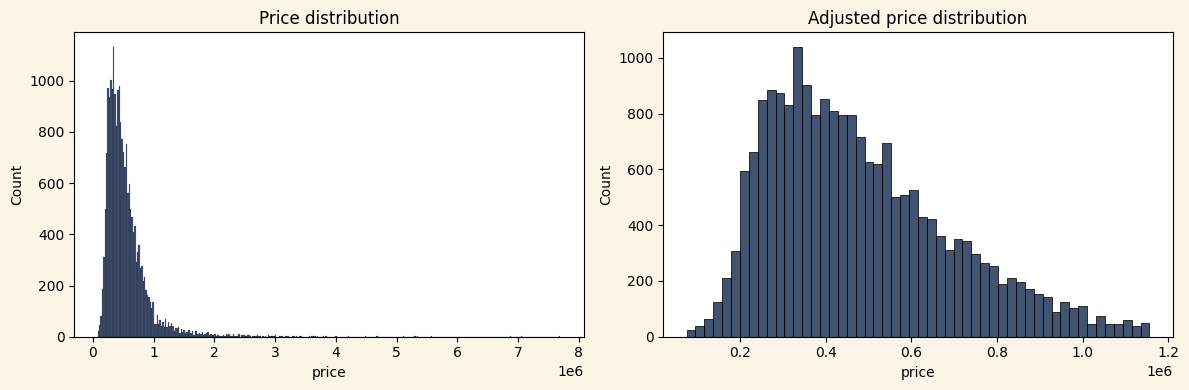

In [90]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Price distribution')
sns.histplot(df['price'], color='#021841ff')

plt.subplot(1, 2, 2)
plt.title('Adjusted price distribution')
df_purged = df[df.price > df.price.quantile(0.95)]
df = df[df.price <= df.price.quantile(0.95)]
sns.histplot(df['price'], color='#021841ff')

plt.tight_layout()
plt.show()

In [91]:
df[['price']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,20532.00
mean,479098.03
std,211395.04
min,75000.00
25%,315000.00
50%,438850.00
75%,605000.00
max,1156000.00


In [92]:
purged = df_purged.shape[0]
percent = purged/(purged+df.shape[0])
print('Purged rows: {} ({:.3f})'.format(purged, percent))

Purged rows: 1081 (0.050)


#### Undestanding the correlation between features... <a id = "9"></a>

The bedrooms, bathrooms, sqft_living, view, and grade features seem to be very well correlated with price, but all the other square footage variables seem to be dangerously correlated which could result in a multi-collinearity problem forcing us to remove them. The "built" and "renovation" year features were the negative surprises for me, as I thought they were more closely related. We will explore these relationships in more detail in future charts.

In [93]:
#applying unnecessary embellishment
coolwarm_cmap = plt.colormaps['coolwarm']
coolwarm = [coolwarm_cmap(i/255) for i in range(256)]
coolwarm_colors = [f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {a})" for r, g, b, a in coolwarm]

cor = df[interesting_columns].corr().round(2)
mask = np.triu(np.ones_like(cor, dtype=bool))
cor = cor.mask(mask)

fig = px.imshow(
    cor,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=coolwarm_colors,
    labels=dict(color="Correlation"),
    title='Correlation heatmap'
)

fig.update_layout(plot_bgcolor='#fbf5e7')
fig.show()

#### Area features... <a id = "10"></a>

The sqft_living variable seemed to have a good distribution as well as the sqft_living15 variable, which represents the same feature focusing on the 15 closest neighbors. Since these are highly correlated, they will probably lead us to a multicollinearity problem, so I will keep only the first one.

The variables sqft_lot and sqft_lot15 appeared to be very bad in terms of distribution. Even when I tried to cut out the most extreme values, the correlation between them and the price variable seemed to remain the same, that is, very low. Let's disregard these two variables as well.

Finally, after further evaluating the meaning of the sqft_above and sqft_basement variables, it was possible to understand the obvious: the sqft_living variable was separated into below-ground and above-ground living space. Most buildings are above ground, so the sqft_living and sqft_above variables are well correlated. Let's keep only sqft_living. On the other hand, few houses have below-ground construction, so the distribution was quite strange. I'm going to transform this variable into a boolean, indicating whether or not there is a basement.

I will take this opportunity to convert the measurement to square meters, which will make my future interpretation of the data easier.

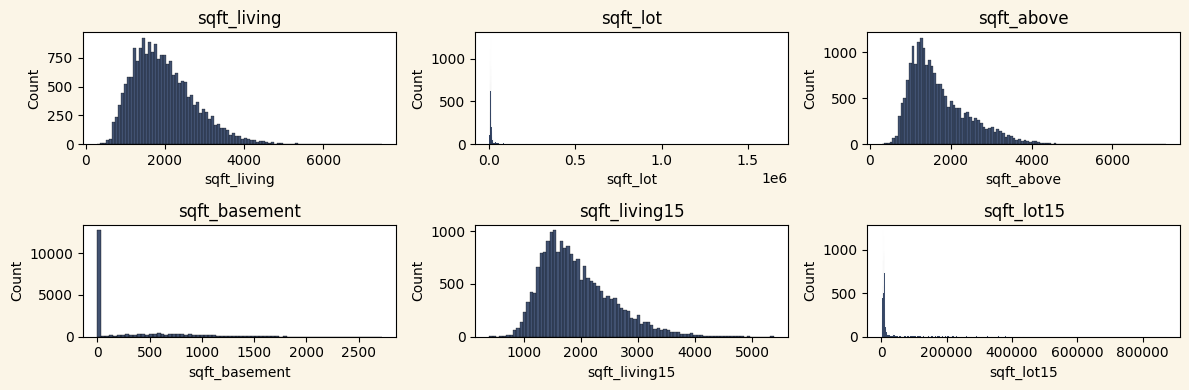

In [94]:
area_cols = [col for col in df.columns if col.startswith('sqft')]
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

for i, col in enumerate(area_cols, 1):
    plt.subplot(math.ceil(len(area_cols)/3), 3, i)
    plt.title(col)
    sns.histplot(df[col], color='#021841ff')

plt.tight_layout()
plt.show()

In [95]:
df['has_basement'] = df['sqft_basement'] > 0
df['living_in_m2'] = df['sqft_living'] * 0.092903
df = df[df.living_in_m2 <= df.living_in_m2.quantile(0.99)] #we will also remove some strange outliers from the database
df = df[df.living_in_m2 > df.living_in_m2.quantile(0.001)]
df.drop(columns=['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement'], inplace=True)

#### Price x Area features... <a id = "11"></a>

With the graphs below we can get an idea that there is a strong relationship between price and living_in_m2 (formerly sqft_living) and, although this may not be statistically significant, between the new has_basement characteristic and price.

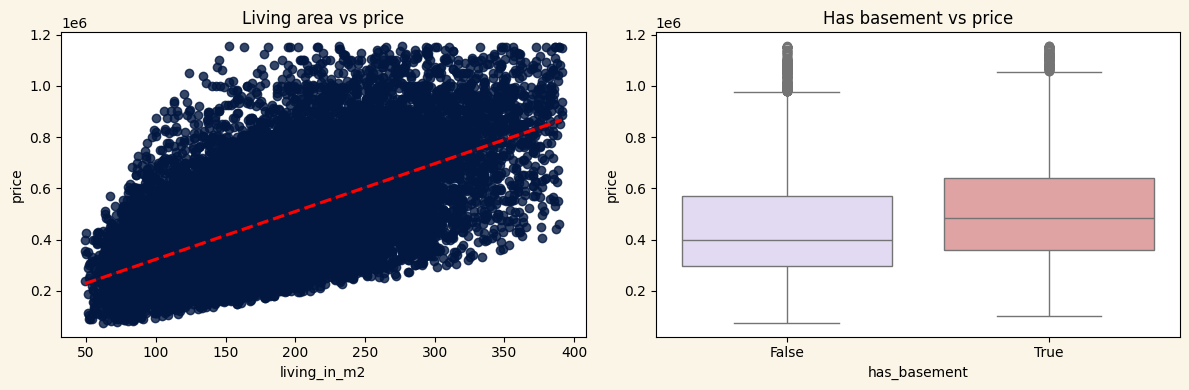

In [96]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Living area vs price')
sns.regplot(x='living_in_m2', y='price', data=df, color='#021841ff', line_kws={'color': 'red', 'linestyle': '--'})

plt.subplot(1, 2, 2)
plt.title('Has basement vs price')
sns.boxplot(x='has_basement', y='price', data=df, palette={'False': "#e0d6f6ff", 'True': "#ea9999ff"})

plt.tight_layout()
plt.show()

#### Year features... <a id = "12"></a>

Now investigating the variables of year of construction and renovation, we can see that the pattern of built houses has evolved over the years, but it seems that the volume of houses that have been renovated is not that large. In fact, some of these renovations were done several years ago, these two things will probably impact the value of this variable for the price model. Let's create a new variable to TRY to capture this effect of renovation.

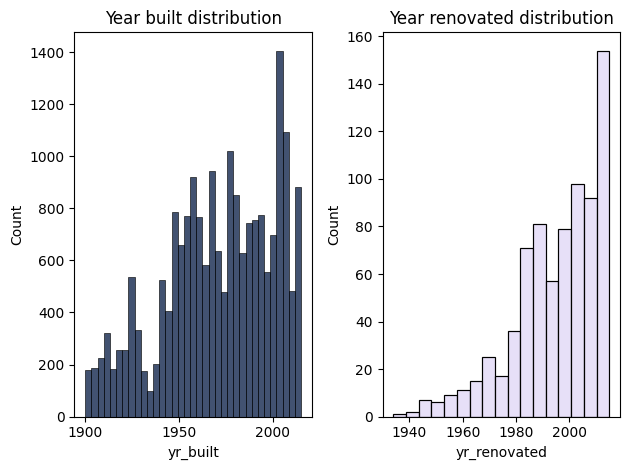

In [97]:
'fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Year built distribution')
sns.histplot(df['yr_built'], color='#021841ff')

plt.subplot(1, 2, 2)
plt.title('Year renovated distribution')
df_test = df[df.yr_renovated > 0]
sns.histplot(df_test['yr_renovated'], color='#e0d6f6ff')

plt.tight_layout()
plt.show()

In [98]:
df['renovated'] = df['yr_renovated'] > 0
renovated = df['renovated'].sum()
percent = renovated/(df.shape[0])
print('Renovated houses: {} ({:.2f})'.format(renovated, percent))

Renovated houses: 761 (0.04)


#### Price vs Year features... <a id = "13"></a>

When we delve deeper into the relationship between the year of construction and renovation variables, we realize that the year of construction variable does not have a linear relationship with price.

If we consider the variable directly, we notice that houses built in the last 50 years seem to gradually have a higher value, but if we apply some condition, for example, observing the values ​​of the decade to which the year belongs, we actually find a non-monotonic or U-shaped relationship, which should not help us if we work with linear regression models. Therefore, we will disregard it.

On the other hand, the renovation variable that we created previously seems to have some relationship with price. Renovated houses have a slightly higher price. Since we have few houses with this information, this relationship will probably not be carried forward by the model, but we will try to keep the variable anyway.

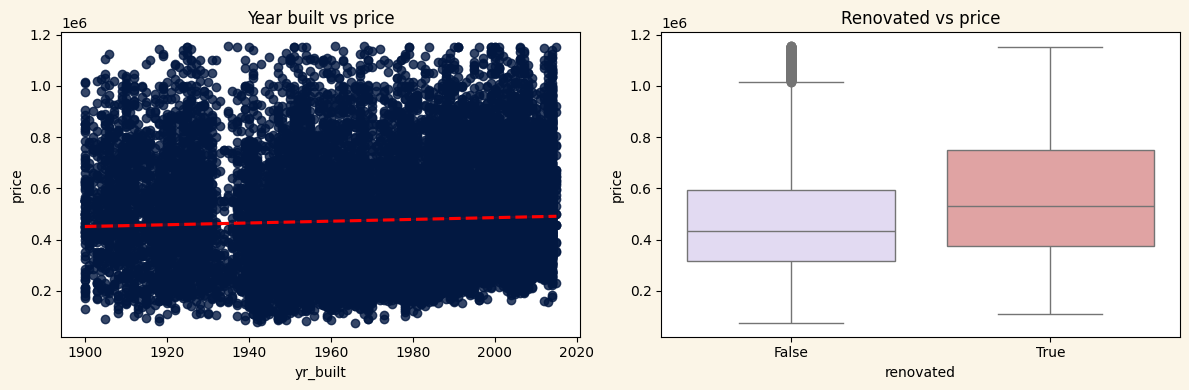

In [99]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Year built vs price')
sns.regplot(x='yr_built', y='price', data=df, color='#021841ff', line_kws={'color': 'red', 'linestyle': '--'})

plt.subplot(1, 2, 2)
plt.title('Renovated vs price')
sns.boxplot(x='renovated', y='price', data=df, palette={'False': "#e0d6f6ff", 'True': "#ea9999ff"})

plt.tight_layout()
plt.show()

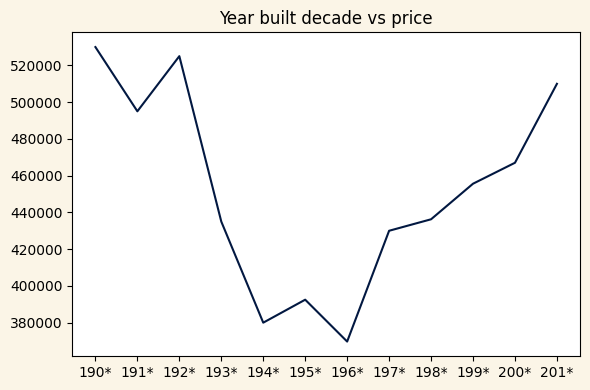

In [100]:
fig = plt.figure(figsize = (6, 4), facecolor = '#fbf5e7')
plt.title('Year built decade vs price')

df['yr_built_cat'] = df['yr_built'].astype(str).str[:3] + '*'
df_graph = df[['yr_built_cat', 'price']].groupby('yr_built_cat').median().reset_index()
plt.plot(df_graph['yr_built_cat'] , df_graph['price'], color='#021841ff')

plt.tight_layout()
plt.show()

In [101]:
df.drop(columns=['yr_built', 'yr_built_cat', 'yr_renovated'], inplace=True)

#### View features... <a id = "14"></a>

Let's start with the waterfront categorical variable. We had previously noticed that it had very little correlation with the price variable and now we finally understand why. Only 84 records out of more than 20k in the database have this field filled with a value other than 0. In addition, we have another variable to represent this same "quality" which is the view. Most of the properties that had a waterfront had good view ratings, so we will disregard waterfront.

As for the view variable, we noticed a slight relationship with the price. The better the view, the higher the price. The problem will probably be similar to the previous variable: volume! When we separate each of the view possibilities, we end up with little representation of each rating. The distribution is not normal, so it will be something that will impact the value that the model gives to this relationship. We will transform it into a new variable called nice_view, which will contain True (1), if the rating given previously is different from 0.

In [102]:
print('Number of rows with waterfront info:', df[df.waterfront > 0].shape[0])
print('Association with waterfront and view:')
df[df.waterfront > 0].view.value_counts()

Number of rows with waterfront info: 63
Association with waterfront and view:


,count
view,
4,47
3,10
2,5
1,1


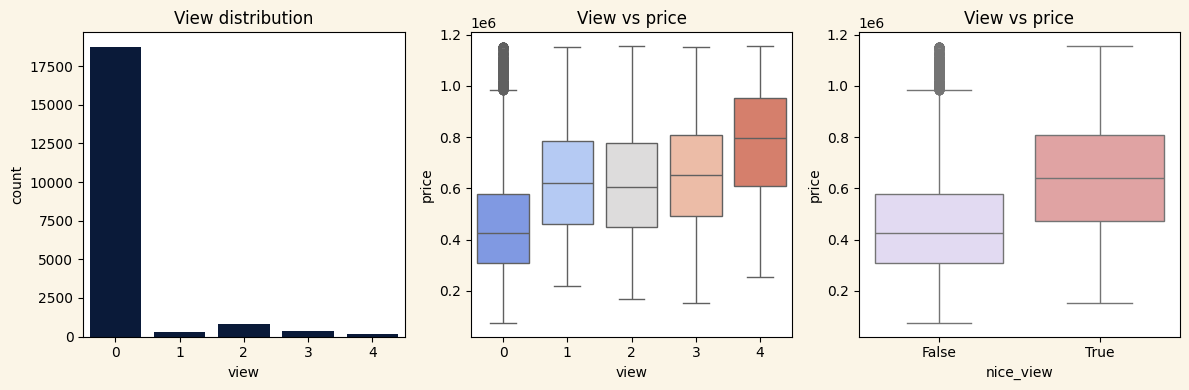

In [103]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 3, 1)
plt.title('View distribution')
sns.countplot(x='view', data=df, color = '#021841ff')

plt.subplot(1, 3, 2)
plt.title('View vs price')
n_colors = len(df['view'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='view', y='price', data=df, palette=palette)

plt.subplot(1, 3, 3)
plt.title('View vs price')
df['nice_view'] = df['view'] > 0
sns.boxplot(x='nice_view', y='price', data=df, palette={'False': "#e0d6f6ff", 'True': "#ea9999ff"})

plt.tight_layout()
plt.show()

In [104]:
df.view.value_counts()

,count
view,
0,18751
2,791
3,339
1,276
4,146


In [105]:
df.drop(columns=['waterfront', 'view'], inplace=True)

#### Condition... <a id = "15"></a>

We had to get creative here too. People seem to have a harder time rating properties at the negative extremes ('1' and '2'), with most of them concentrated in the middle '3' score. When comparing the relationship of this variable to price, we also noticed that the distribution of prices across each of the categories is extremely similar, with slightly higher prices for the '5' category. So, to highlight this slightly superior behavior, we created a perfect property condition variable.

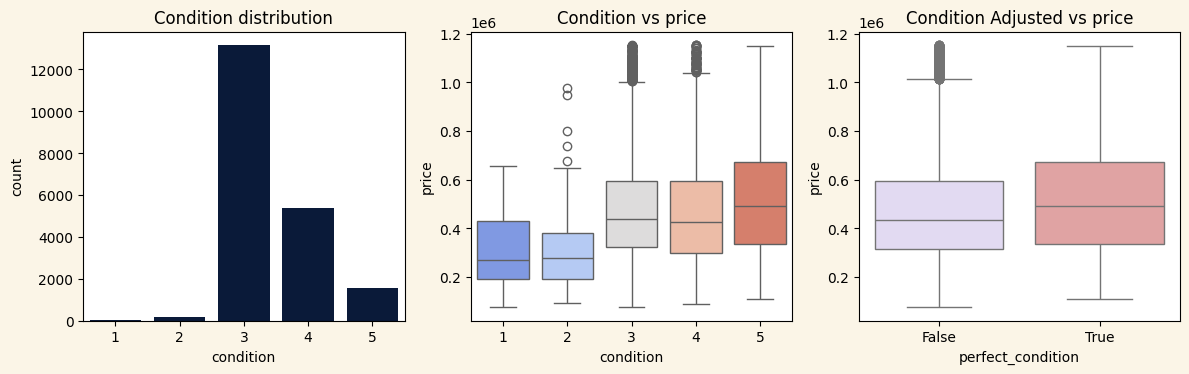

In [106]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 3, 1)
plt.title('Condition distribution')
sns.countplot(x='condition', data=df, color = '#021841ff')

plt.subplot(1, 3, 2)
plt.title('Condition vs price')
n_colors = len(df['condition'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='condition', y='price', data=df, palette=palette)

plt.subplot(1, 3, 3)
plt.title('Condition Adjusted vs price')
df['perfect_condition'] = df['condition'] > 4
sns.boxplot(x='perfect_condition', y='price', data=df, palette={'False': "#e0d6f6ff", 'True': "#ea9999ff"})

plt.tight_layout()
plt.show()

In [107]:
df.condition.value_counts()

,count
condition,
3,13158
4,5399
5,1555
2,164
1,27


In [108]:
df.drop(columns=['condition'], inplace=True)

#### Grade... <a id = "16"></a>

For the grade variable, the initial distribution seemed to have some problems due to the low presence of some grades in the base. This would interfere with the subsequent linear regression model that we are thinking of developing, so I corrected the problem by creating new grade classes. From now on, grades below 7 will be considered 1, above 9 will be considered 5 and the other values ​​will be distributed continuously. Then we have a good distribution of data and a good relationship between the variable and the price.

In [109]:
df_aux = pd.DataFrame(df.grade.value_counts()).sort_index().reset_index()
df_aux['percentage'] = df_aux['count']/df.shape[0]
df_aux

,grade,count,percentage
0,3,2,0.000099
1,4,20,0.000985
2,5,232,0.011427
3,6,2034,0.100182
4,7,8968,0.441708
5,8,5942,0.292666
6,9,2289,0.112742
7,10,707,0.034822
8,11,108,0.005319
9,12,1,0.000049


In [110]:
_list = list()
for value in df.grade:
    if value <= 6:
        _list.append(1)
    elif value >= 10:
        _list.append(5)
    else:
        _list.append(value-5)

df['grade'] = _list

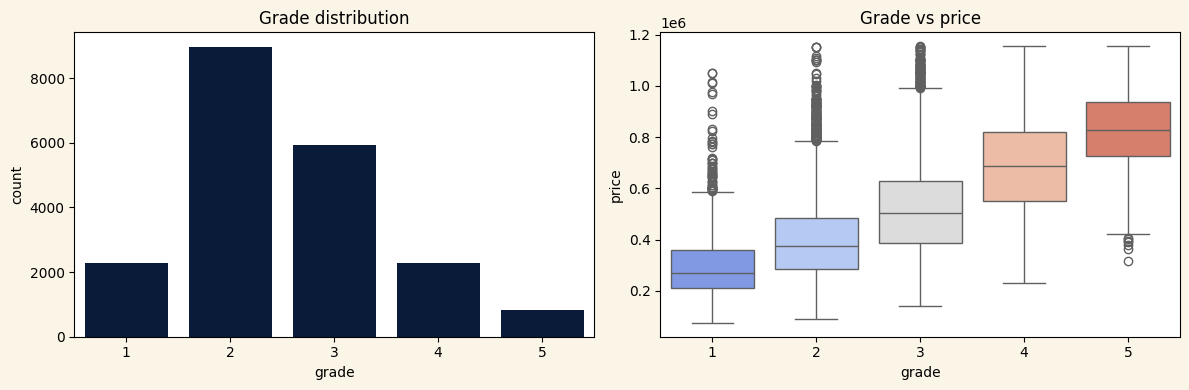

In [111]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Grade distribution')
sns.countplot(x='grade', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Grade vs price')
n_colors = len(df['grade'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='grade', y='price', data=df, palette=palette)

plt.tight_layout()
plt.show()

#### Bedrooms... <a id = "17"></a>

We initially identified a problem with the distribution of some very unusual values. There were properties with more than 7 bedrooms, for example, that did not seem to be correct, as they did not have extreme prices or areas. Since this would interfere with the subsequent linear regression model we are planning to develop, I fixed the problem by creating new grade classes. From now on, grades below 2 will be considered 1, above 4 will be considered 3 and the other possible value will be 2.

In [112]:
df_aux = pd.DataFrame(df.bedrooms.value_counts()).sort_index().reset_index()
df_aux['percentage'] = df_aux['count']/df.shape[0]
df_aux

,bedrooms,count,percentage
0,0,9,0.000443
1,1,181,0.008915
2,2,2734,0.134660
3,3,9598,0.472738
4,4,6245,0.307590
5,5,1278,0.062946
6,6,217,0.010688
7,7,25,0.001231
8,8,8,0.000394
9,9,4,0.000197


In [113]:
_list = list()
for value in df.bedrooms:
    if value <= 2:
        _list.append(1)
    elif value >= 4:
        _list.append(3)
    else:
        _list.append(2)

df['bedrooms'] = _list

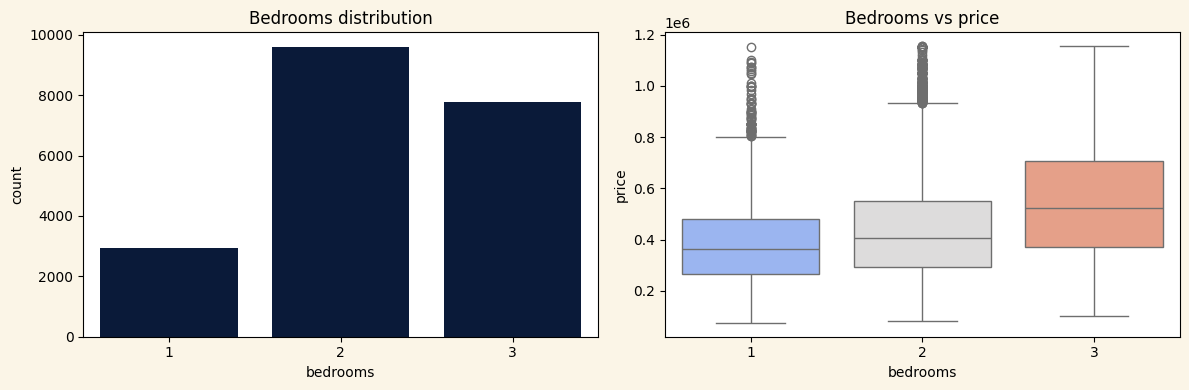

In [114]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Bedrooms distribution')
sns.countplot(x='bedrooms', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Bedrooms vs price')
n_colors = len(df['bedrooms'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='bedrooms', y='price', data=df, palette=palette)

plt.tight_layout()
plt.show()

#### Bathrooms [and lavatory]... <a id = "18"></a>

Now, for the bathrooms variable, we had a semantic surprise. It seems that the American standard for counting the number of bathrooms is a bit messy and puts in the same variable the number of "complete" bathrooms (bathtub, sink, toilet) with bathrooms that have only some of these characteristics, assigning decimal values ​​to represent their completeness.

To try to simplify this problem a bit, we removed the integer part of this variable and called it real_bathrooms. The distribution is not entirely normal, so we try to fix it a litle bit with a reorganization of the distribution, meaning that 0 to 1 will became 1, 2 will remains the same and we will aggregate 3 or more bathrooms in the same class. The more real bathrooms, the higher the price of the properties.

With the remaining decimal information, we created a new variable called has_lavatory that will check for the presence of these secondary rooms. We transformed it to a boolean variable, indicating whether the house has this room or not, due to the difficulty of interpretation of the decimals. Fortunately, properties that have this have a higher price.

In [115]:
df['real_bathrooms'] = df['bathrooms'].astype(int)
df['has_lavatory'] = df['bathrooms']%1 > 0

df_aux = pd.DataFrame(df.real_bathrooms.value_counts()).sort_index().reset_index()
df_aux['percentage'] = df_aux['count']/df.shape[0]
df_aux

,real_bathrooms,count,percentage
0,0,71,0.003497
1,1,8304,0.409004
2,2,10164,0.500616
3,3,1638,0.080678
4,4,115,0.005664
5,5,10,0.000493
6,7,1,0.000049


In [116]:
_list = list()
for value in df.real_bathrooms:
    if value <= 1:
        _list.append(1)
    elif value >= 3:
        _list.append(3)
    else:
        _list.append(2)

df['real_bathrooms'] = _list

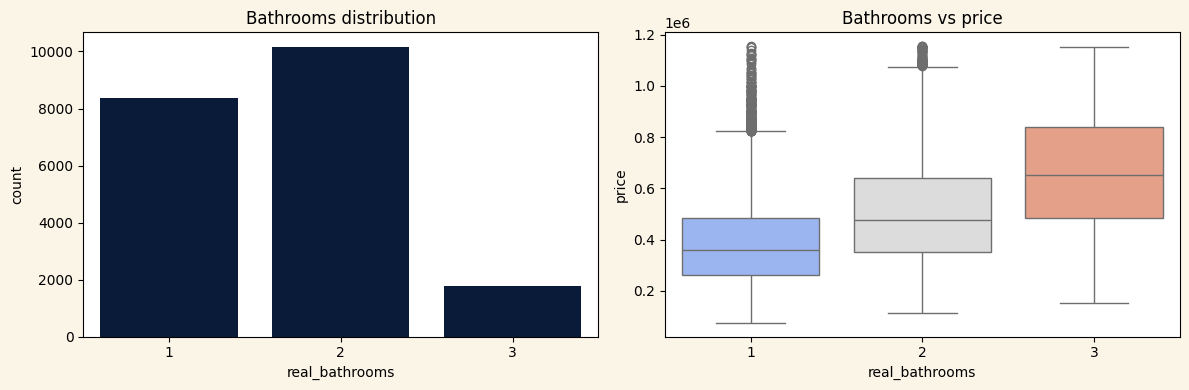

In [117]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Bathrooms distribution')
sns.countplot(x='real_bathrooms', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Bathrooms vs price')
n_colors = len(df['real_bathrooms'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='real_bathrooms', y='price', data=df, palette=palette)

plt.tight_layout()
plt.show()

In [118]:
df.drop(columns=['bathrooms'], inplace=True)

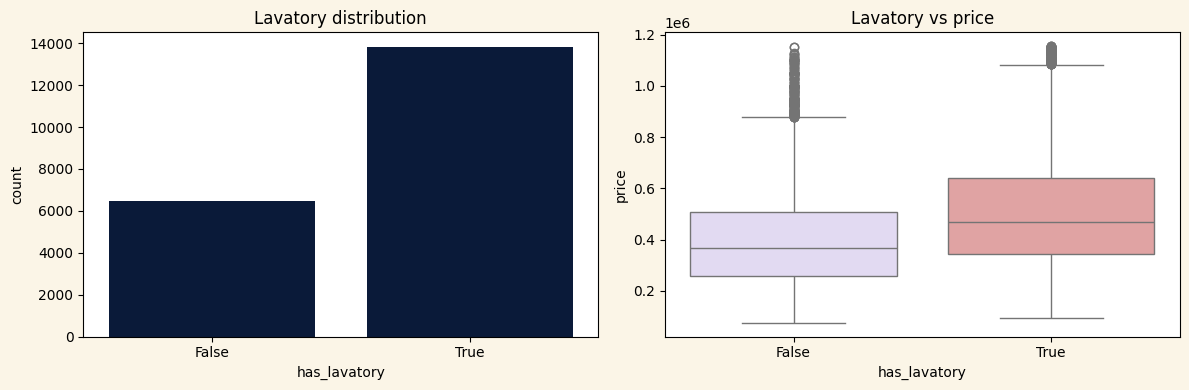

In [119]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Lavatory distribution')
sns.countplot(x='has_lavatory', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Lavatory vs price')
sns.boxplot(x='has_lavatory', y='price', data=df, palette={'False': "#e0d6f6ff", 'True': "#ea9999ff"})

plt.tight_layout()
plt.show()

#### Floors... <a id = "19"></a>

Another variable, same approach. The data distribution is a bit strange and here we also have the presence of decimal values ​​for something that should be an integer value. To simplify the problem and the relationship, we built a boolean variable that checked whether the property had only one floor or more than one floor. Later we observed that fortunately properties with more than one floor have a relatively higher price than single_floor ones.

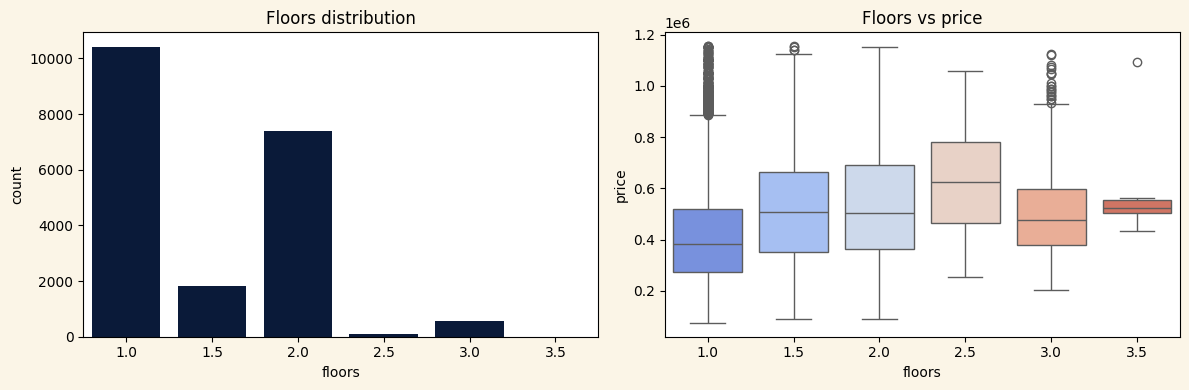

In [120]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Floors distribution')
sns.countplot(x='floors', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Floors vs price')
n_colors = len(df['floors'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='floors', y='price', data=df, palette=palette)

plt.tight_layout()
plt.show()

In [121]:
df['single_floor'] = df['floors'] == 1
df.drop(columns=['floors'], inplace=True)

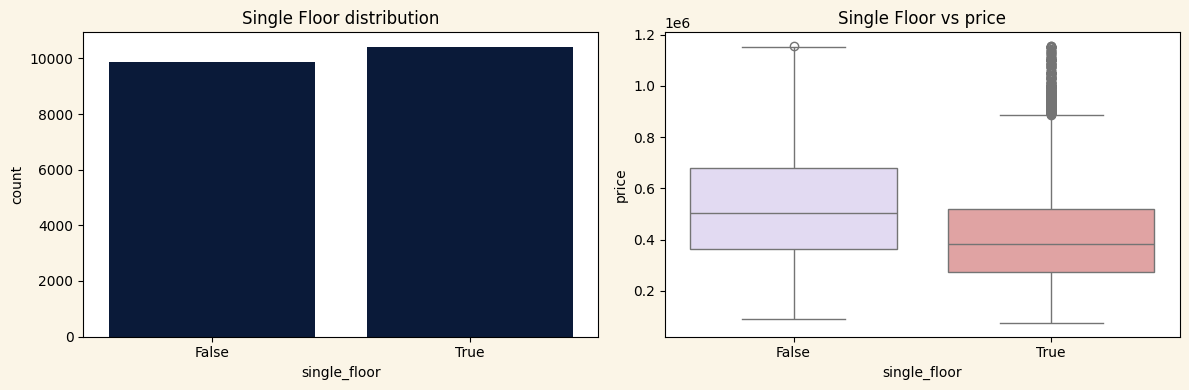

In [122]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Single Floor distribution')
sns.countplot(x='single_floor', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Single Floor vs price')
sns.boxplot(x='single_floor', y='price', data=df, palette={'False': "#e0d6f6ff", 'True': "#ea9999ff"})

plt.tight_layout()
plt.show()

#### Date features... <a id = "20"></a>

We also analyzed the date variable, trying to find some kind of seasonality or specific pattern for a given period. Since we do not have a very large sample of data, it is difficult to conclude whether there is a strong trend, but apparently more trades are made between the second and third quarters, which could characterize this period as a "high season", while the festive periods (Q4) and the beginning of the year (Q1) seem to be more lukewarm both in volume and in average amount traded. We will create the month variable to try to capture this behavior.

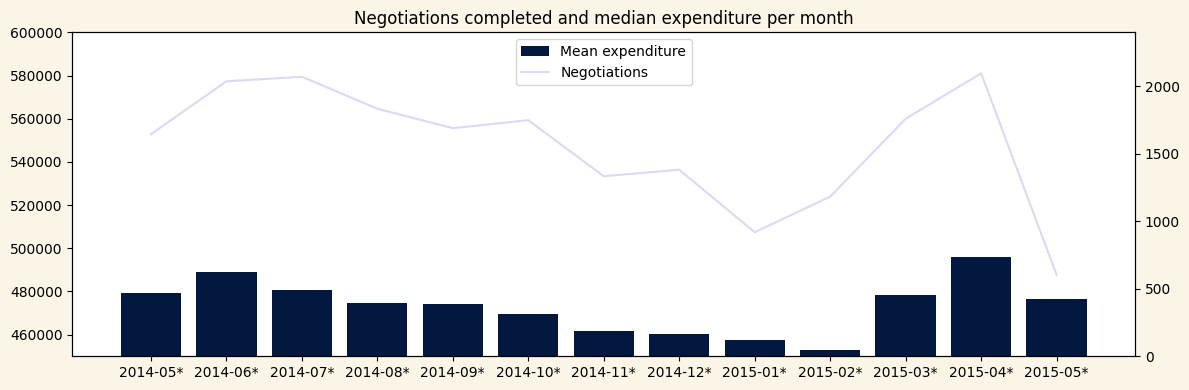

In [123]:
fig, ax1 = plt.subplots(figsize = (12, 4), facecolor = '#fbf5e7')
plt.title('Negotiations completed and median expenditure per month')

df['month'] = df['date'].astype(str).str[:7] + '*'
df_sum = df[['month', 'price']].groupby('month').mean().reset_index()
ax1.bar(df_sum['month'] , df_sum['price'], color='#021841ff', label='Mean expenditure')
ax1.set_ylim(450000, 600000)

ax2 = ax1.twinx()
df_count = df[['month', 'price']].groupby('month').count().reset_index()
ax2.plot(df_count['month'] , df_count['price'], color='#e0d6f6ff', label='Negotiations')
ax2.set_ylim(0, 2400)

df['month'] = df['date'].dt.month

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc ='upper center')
plt.tight_layout()
plt.show()

#### Geolocalization features... <a id = "21"></a>

We came up with the idea of ​​creating a variable that would represent the financial aspect to which the zone/zipcode belonged. We grouped the prices of the properties traded and classified them into quartiles. Thus, we created 4 groups of zipcodes, with group 1 containing the zipcodes with the lowest average prices and group 4 containing the highest average prices. When we plotted the distribution and the boxplots below, we realized that there is logically a correlation between these values. The expectation is that this does not generate an autocorrelation, violating some of the premises of the linear regression models. Finally, we deleted the columns with regional aspects that would no longer be used.

In [124]:
df_grouped = df.groupby(by='zipcode').agg(region_price=('price', 'mean')).reset_index()
df_grouped['quartile_zone'] = pd.qcut(df_grouped['region_price'], q=4, labels=[1, 2, 3, 4])
df = df.merge(df_grouped[['zipcode', 'quartile_zone']], how='left', on='zipcode')

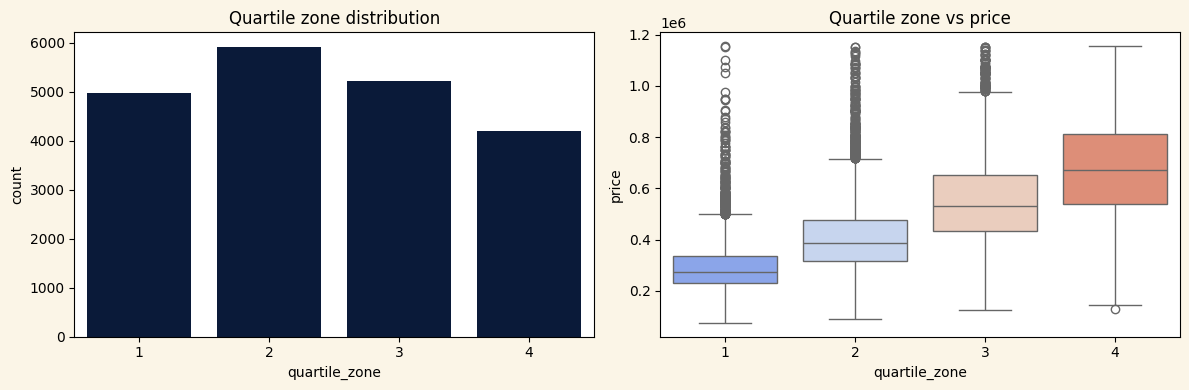

In [125]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Quartile zone distribution')
sns.countplot(x='quartile_zone', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Quartile zone vs price')
n_colors = len(df['quartile_zone'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='quartile_zone', y='price', data=df, palette=palette)

df.drop(columns=['lat', 'long', 'quartile_zone'], inplace=True)

plt.tight_layout()
plt.show()

### Train-Test Split <a id = "22"></a>

In this session, we will divide the main dataframe into two other dataframes, called training and test. This is important for the next stage of this analysis, which is the development of a linear regression model. There will be a stratification by zipcodes to make the database more homogeneous.

We will once again apply the concept of zipcode enhancement zones, but taking into account only the training database to "train" these regions. This is important to avoid the famous "data leak" that would contaminate the test database with information that it did not yet have.

In [126]:
df_train, df_test = train_test_split(df, test_size = 0.33, random_state = 41, stratify=df['zipcode'])

df_grouped = df_train.groupby(by='zipcode').agg(region_price=('price', 'mean')).reset_index()
df_grouped['quartile_zone'] = pd.qcut(df_grouped['region_price'], q=4, labels=[1, 2, 3, 4])

df_train = df_train.merge(df_grouped[['zipcode', 'quartile_zone']], how='left', on='zipcode')
df_test = df_test.merge(df_grouped[['zipcode', 'quartile_zone']], how='left', on='zipcode')
df_train.drop(columns=['zipcode'], inplace=True)
df_test.drop(columns=['zipcode'], inplace=True)

### EDA Conclusions <a id = "23"></a>

The variables that seemed to be most correlated with the price were quartile_zone, grade and living_in_m2. Some points of attention can also be raised for this set, such as the fact that living_in_m2 and grade are highly correlated with each other and the fact that quartile_zone uses the average price of each zipcode in its composition, with the price itself being the predicted variable. In both cases, we will have to pay attention in the future to Linear Regression assumptions of autocorrelation and normality of error, for example.

Other interesting variables were the Boolean nice_view, which apparently separated the property prices very well, and the numeric bedrooms and bathrooms, which presented good distributions and an interesting correlation. The single_floor variable was also curiously interesting, where we were able to remove some of the complexity of floor and at the same time identify the impact that having a case of only one floor can have on the price.

Finally, the negative surprise was the low importance of the year of renovation and construction variables, as well as the other various area variables that existed and could not be used as well, not even when we tried to create, for example, the has_basement variable, which presented a weak correlation.

# Prediction Models <a id = "24"></a>

In [127]:
from joblib import dump
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [128]:
df_train_model = df_train.copy(deep=True)
df_test_model = df_test.copy(deep=True)

In [129]:
# Preprocesamiento de datos
X_train_raw = df_train_model.drop(columns=['date', 'price'])  # Excluir columnas irrelevantes
X_test_raw = df_test_model.drop(columns=['date', 'price'])  # Excluir columnas irrelevantes
y_train = df_train_model['price']
y_test = df_test_model['price']

In [130]:
# Ajustar el escalador con los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train_raw)

StandardScaler()

In [131]:
# Exportar el escalador
scaler_path = 'scaler.joblib'
dump(scaler, scaler_path)

['scaler.joblib']

In [132]:
# Transformar los datos de entrenamiento y prueba
X_train = pd.DataFrame(scaler.transform(X_train_raw), columns=X_train_raw.columns)
X_test = pd.DataFrame(scaler.transform(X_test_raw), columns=X_test_raw.columns)

## Linear Regression <a id = "25"></a>

In [133]:
# Entrenamiento del modelo
model_linear = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     3339.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:28:28   Log-Likelihood:            -1.7649e+05
No. Observations:               13603   AIC:                         3.530e+05
Df Residuals:                   13590   BIC:                         3.531e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.753e+05    894.946    531.078      0.000    4.74e+05    4.77e+05
bedrooms           -896.0289   1143.021     -0.784      0.433   -3136.509    1344.452
grade              4.865e+04   1390.994     34.972      0.000    4.59e+04    5.14e+04
has_basement       1.067e+04   1020.200     10.455      0.000    8666.570    1.27e+04
living_in_m2       7.369e+04   1595.082     46.196      0.000    7.06e+04    7.68e+04
renovated           1.24e+04    901.096     13.766      0.000    1.06e+04    1.42e+04
nice_view          2.775e+04    924.244     30.027      0.000    2.59e+04    2.96e+04
perfect_condition  1.748e+04    907.423     19.265      0.000    1.57e+04    1.93e+04
real_bathrooms    -8450.7779   1227.052     -6.887      0.000   -1.09e+04   -6045.586
has_lavatory      -1.244e+04   1034.226    -12.025      0.000   -1.45e+04   -1.04e+04
single_floor      -9432.0300   1128.915     -8.355      0.000   -1.16e+04   -7219.199
month             -6899.8982    895.680     -7.704      0.000   -8655.555   -5144.241
quartile_zone      1.081e+05    957.987    112.885      0.000    1.06e+05     1.1e+05
==============================================================================
Omnibus:                     1565.929   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3255.018
Skew:                           0.724   Prob(JB):                         0.00
Kurtosis:                       4.909   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Metrics
y_pred_linear = model_linear.predict(sm.add_constant(X_test))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_linear, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_linear))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_linear))
print('Max Error:', metrics.max_error(y_test, y_pred_linear))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_linear))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_linear))
print('R^2:', metrics.r2_score(y_test, y_pred_linear))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_linear))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred_linear))

Mean Absolute Error (MAE): 78678.03692736002
Mean Squared Error (MSE): 11149777983.223972
Root Mean Squared Error (RMSE): 105592.50912457745
Mean Absolute Percentage Error (MAPE): 0.18034025481778368
Explained Variance Score: 0.7423843554516163
Max Error: 622834.6557019748
Mean Squared Log Error: 0.05097469199596767
Median Absolute Error: 61431.458449631056
R^2: 0.7423642559353147
Mean Poisson Deviance: 21858.01124841854
Mean Gamma Deviance: 0.051347149843176114


In [135]:
# Exportar el modelo
export_path_linear = 'model_linear.joblib'
dump(model_linear, export_path_linear)

['model_linear.joblib']

## Random Forest <a id = "26"></a>

In [136]:
# Entrenamiento del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [137]:
# Metrics
y_pred_rf = model_rf.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_rf, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_rf))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_rf))
print('Max Error:', metrics.max_error(y_test, y_pred_rf))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_rf))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_rf))
print('R^2:', metrics.r2_score(y_test, y_pred_rf))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_rf))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred_rf))

Mean Absolute Error (MAE): 78297.59311267153
Mean Squared Error (MSE): 11705582848.579159
Root Mean Squared Error (RMSE): 108192.34191281359
Mean Absolute Percentage Error (MAPE): 0.17893872699238422
Explained Variance Score: 0.7295248048038818
Max Error: 693878.1666666666
Mean Squared Log Error: 0.051715660310091144
Median Absolute Error: 57057.880000000005
R^2: 0.7295213813726098
Mean Poisson Deviance: 22619.042797388807
Mean Gamma Deviance: 0.051177744600986355


In [138]:
# Exportar el modelo
export_path_rf = 'model_rf.joblib'
dump(model_rf, export_path_rf)

['model_rf.joblib']